In [5]:
pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#in built dataset from sklearn is used
import pandas as pd 
import numpy as np 
import sklearn
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [7]:
boston_dataset = datasets.load_boston()
boston_dataset # it returns a dictionary
# print(boston_dataset.DESCR)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [9]:
#Load the data and divide into X and Y varaiable
boston_pd = pd.DataFrame(boston_dataset.data) 
boston_pd.columns = boston_dataset.feature_names 
boston_pd_target = np.asarray(boston_dataset.target) 
boston_pd['House Price'] = pd.Series(boston_pd_target)

# input 
X = boston_pd.iloc[:, :-1] 

#output 
Y = boston_pd.iloc[:, -1] 


In [10]:
boston_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.35)

In [12]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
310,2.63548,0.0,9.90,0.0,0.544,4.973,37.8,2.5194,4.0,304.0,18.4,350.45,12.64
395,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,24.0,666.0,20.2,391.98,17.12
472,3.56868,0.0,18.10,0.0,0.580,6.437,75.0,2.8965,24.0,666.0,20.2,393.37,14.36
146,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65
163,1.51902,0.0,19.58,1.0,0.605,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.16439,22.0,5.86,0.0,0.431,6.433,49.1,7.8265,7.0,330.0,19.1,374.71,9.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
167,1.80028,0.0,19.58,0.0,0.605,5.877,79.2,2.4259,5.0,403.0,14.7,227.61,12.14
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04


In [13]:
 #Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 


LinearRegression()

In [14]:
# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 
lreg_y_pred # shows predicted prices of houses from test data

array([19.00454608, 19.96281841, 21.72525168, 15.70241103, 41.13600333,
       11.03075781,  9.22506843, 31.38147345, 26.13367581, 15.86844889,
       24.1515555 , 17.6262882 , 28.54529928, 19.63109994, 20.98513742,
       36.78255348, 35.08298395, 27.04909661, 30.16570042, 35.65815441,
       18.49099146, 13.79826997, 21.34769181, 10.92054071, 32.41109688,
       19.14188145, 21.97016172, 18.0386189 , 18.5422615 , 19.74577086,
       22.23951727, 15.77825327, 13.51712765, 16.06424421, 25.20923472,
       24.41769004, 18.36815269, 23.45339267, 19.21676332, 21.8360594 ,
       36.84090646, 17.23212498, 15.16602097, 13.71398498, 34.67400751,
       33.15310195, 24.75948274, 20.14730916,  6.98272498, 36.05505543,
        7.40926101, 18.80573618, 37.80960759, 25.08372231, 11.70168527,
        2.99088555, 23.82625615, 21.29820486, 18.5855597 , 34.44889044,
        0.18982878, 18.39789675, 17.01965882, 33.03582432, 20.78764538,
       20.97760186, 30.71488004, 13.58821174, 12.63099027, 27.72

In [15]:
#calculating mean square error(MSE)
mean_squared_error=np.mean((lreg_y_pred-y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error) 

Mean squared Error on test set :  26.929057710579784


In [17]:
#putting together the coeffient& theit corresponding variables
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print(lreg_coefficient) # y=-0.15X1 + 0.05X2 - 0.01X3 + ......
#model gives too much imp to NOX feature as its highly -ve

    Columns  Coefficient Estimate
0      CRIM             -0.050141
1        ZN              0.044148
2     INDUS             -0.016786
3      CHAS              2.505684
4       NOX            -14.675166
5        RM              3.359688
6       AGE              0.002439
7       DIS             -1.481000
8       RAD              0.266665
9       TAX             -0.011600
10  PTRATIO             -0.848740
11        B              0.010690
12    LSTAT             -0.629486


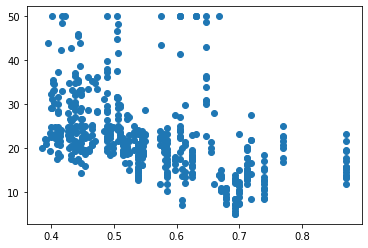

In [29]:
plt.scatter(boston_pd['NOX'],boston_pd['House Price'])

<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

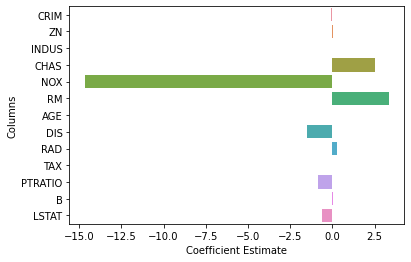

In [30]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate',y='Columns',data=lreg_coefficient)

In [31]:
#import ridge regression from sklearn
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 2) # alpha is a hyper parameter which needs to be experimented
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 

In [32]:
#calculate MSE
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

27.982118229618415


In [33]:
#get ridge coeffient
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Linear Coeff.Estimate'] = pd.Series(lreg.coef_)
ridge_coefficient['Ridge Coeff.Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 


    Columns  Linear Coeff.Estimate  Ridge Coeff.Estimate
0      CRIM              -0.050141             -0.038329
1        ZN               0.044148              0.046088
2     INDUS              -0.016786             -0.052935
3      CHAS               2.505684              2.196689
4       NOX             -14.675166             -4.796951
5        RM               3.359688              3.364817
6       AGE               0.002439             -0.005121
7       DIS              -1.481000             -1.339092
8       RAD               0.266665              0.245369
9       TAX              -0.011600             -0.012597
10  PTRATIO              -0.848740             -0.767285
11        B               0.010690              0.011635
12    LSTAT              -0.629486             -0.650079


Import Lasso Regression from Sklearn

In [41]:
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = 0.05) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 

In [42]:
#calculate MSE
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 

Mean squared error on test set 28.852567791120112


In [45]:
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
print(lasso_coeff) 

    Columns  Coefficient Estimate
0      CRIM             -0.031040
1        ZN              0.046575
2     INDUS             -0.063056
3      CHAS              1.575005
4       NOX             -0.000000
5        RM              3.344849
6       AGE             -0.007197
7       DIS             -1.242117
8       RAD              0.236567
9       TAX             -0.013310
10  PTRATIO             -0.728792
11        B              0.012121
12    LSTAT             -0.664903


In [46]:
# import model 
from sklearn.linear_model import ElasticNet 

e_net = ElasticNet(alpha = .01,l1_ratio=.3) 
e_net.fit(x_train, y_train) 

ElasticNet(alpha=0.01, l1_ratio=0.3)

In [49]:
#calculate prediction & MSE
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

Mean Squared Error on test set 28.104057374380524


In [48]:
e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

,Columns,Coefficient Estimate
0,CRIM,-0.037521
1,ZN,0.046244
2,INDUS,-0.055177
3,CHAS,2.120061
4,NOX,-4.053883
5,RM,3.352462
6,AGE,-0.005486
7,DIS,-1.326735
8,RAD,0.244379
9,TAX,-0.012707
